In [1]:
import prosperity3bt
import pandas as pd
import itertools

from prosperity3bt.runner import run_backtest
from prosperity3bt.models import TradeMatchingMode
from prosperity3bt.file_reader import FileSystemReader
from pathlib import Path

from importlib import reload

In [2]:
import trader_r1_squidReal as squidReal
reload(squidReal)


def day_profit(result):
    last_timestamp = result.activity_logs[-1].timestamp

    profit = 0
    for row in reversed(result.activity_logs):
        if row.timestamp != last_timestamp:
            break

        profit += row.columns[-1]

    return profit

def backtest_days(trader, days=[-2, -1, 0], data_path='.', round=1):
    profits = []
    for day in days:
        backtest_results = prosperity3bt.runner.run_backtest(trader, file_reader=FileSystemReader(Path(data_path)), round_num=round, day_num=day, print_output=False, trade_matching_mode=TradeMatchingMode.all, no_names=True, show_progress_bar=False)
        profit = day_profit(backtest_results)
        profits.append(profit)
    return profits

In [3]:
def generate_param_combinations(param_grid):
    param_names = param_grid.keys()
    param_values = param_grid.values()
    combinations = list(itertools.product(*param_values))
    return [dict(zip(param_names, combination)) for combination in combinations]


param_grid_ink = {
    'ink_change_threshold_pct': [0.01,0.02, 0.03, 0.04],
    'ink_window_size': [5, 10, 15, 20, 25, 30, 35]
}

param_grid_squidReal = {
    'WINDOW': [10,50],
    'Z_ENTRY': [.5,1,1.5,2,2.5,3],
    'Z_EXIT': [.1,.3,.5,.8,1],
    'MIN_VOL': [1]
}

param_profits = []

for params in generate_param_combinations(param_grid_squidReal):
    trader = squidReal.Trader(params)
    days = [-2, -1, 0]
    profits = backtest_days(trader, days=days, data_path='..', round=1)
    for d in days:
        params[f'profit_day_{d}'] = profits[days.index(d)]
    param_profits.append(params)

KeyboardInterrupt: 

In [25]:
df = pd.DataFrame(param_profits)
df['tot_profit'] = df[[f'profit_day_{d}' for d in days]].sum(axis=1)
df.sort_values(by='tot_profit', ascending=False, inplace=True)
df.to_csv('./backtestsP/inktrader_bt_results.csv')

In [26]:
df

,WINDOW,Z_ENTRY,Z_EXIT,MIN_VOL,profit_day_-2,profit_day_-1,profit_day_0,tot_profit
59,50,3.0,1.0,1,0.0,0.0,0.0,0.0
25,10,3.0,0.1,1,0.0,0.0,0.0,0.0
58,50,3.0,0.8,1,0.0,0.0,0.0,0.0
57,50,3.0,0.5,1,0.0,0.0,0.0,0.0
56,50,3.0,0.3,1,0.0,0.0,0.0,0.0
29,10,3.0,1.0,1,0.0,0.0,0.0,0.0
55,50,3.0,0.1,1,0.0,0.0,0.0,0.0
28,10,3.0,0.8,1,0.0,0.0,0.0,0.0
27,10,3.0,0.5,1,0.0,0.0,0.0,0.0
26,10,3.0,0.3,1,0.0,0.0,0.0,0.0


In [22]:
# find the best parameters 
best_params = df.loc[df['profit_day_-1'].idxmax()]
print("Best parameters:")

Best parameters:


In [26]:
from read_submission_log import read_submission_log

market, trades, sandbox = read_submission_log('submissions/trader_best2_new.log')

In [27]:
from matplotlib import pyplot as plt

In [28]:
ink = market[market['product'] == 'SQUID_INK']
resin = market[market['product'] == 'RAINFOREST_RESIN']
kelp = market[market['product'] == 'KELP']

In [29]:
inkt = trades[(trades['symbol'] == 'SQUID_INK') & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]
inktvol = pd.DataFrame()

inktvol['timestamp'] = inkt['timestamp']
inktvol['quantity'] = inkt['quantity'] * ((inkt['buyer'] == 'SUBMISSION') * 2 - 1)
inktvol['price'] = inkt['price']

In [30]:
(resintvol['quantity'] < 0).sum()
(kelpvol['quantity'] < 0).sum()
(inktvol['quantity'] < 0).sum()

np.int64(152)

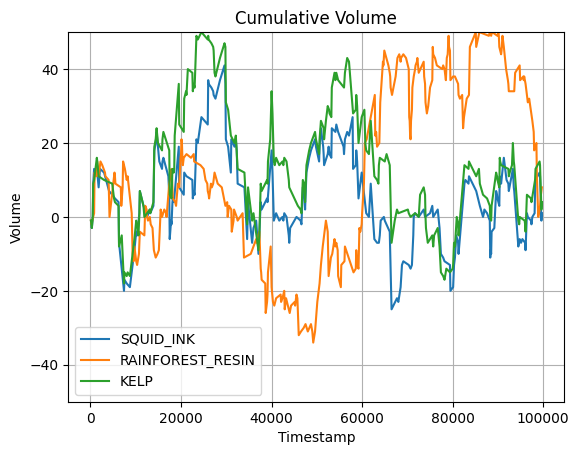

In [31]:
resint = trades[(trades['symbol'] == 'RAINFOREST_RESIN') & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]
resintvol = pd.DataFrame()

resintvol['timestamp'] = resint['timestamp']
resintvol['quantity'] = resint['quantity'] * ((resint['buyer'] == 'SUBMISSION') * 2 - 1)
resintvol['price'] = resint['price']

kelpt = trades[(trades['symbol'] == 'KELP') & ((trades['buyer'] == 'SUBMISSION') | (trades['seller'] == 'SUBMISSION'))]
kelpvol = pd.DataFrame()

kelpvol['timestamp'] = kelpt['timestamp']
kelpvol['quantity'] = kelpt['quantity'] * ((kelpt['buyer'] == 'SUBMISSION') * 2 - 1)
kelpvol['price'] = kelpt['price']
# kelpt.groupby('timestamp')['quantity'].sum().sort_index().cumsum().plot()

plt.plot(inktvol.groupby('timestamp')['quantity'].sum().sort_index().cumsum())
plt.plot(resintvol.groupby('timestamp')['quantity'].sum().sort_index().cumsum())
plt.plot(kelpvol.groupby('timestamp')['quantity'].sum().sort_index().cumsum())
plt.legend(['SQUID_INK', 'RAINFOREST_RESIN', 'KELP'])
plt.title('Cumulative Volume')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.ylim(-50, 50)
plt.grid()
plt.show()


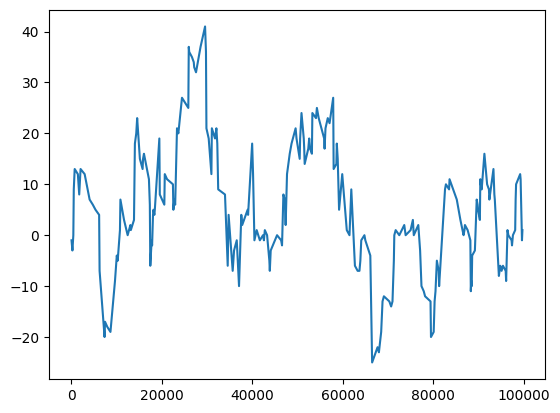

In [32]:
plt.plot(inktvol.groupby('timestamp')['quantity'].sum().sort_index().cumsum())

In [33]:
kelpt['quantity']

0        1
3        1
6        1
8        3
12       5
        ..
1176     3
1183     2
1186     1
1190    12
1192     2
Name: quantity, Length: 255, dtype: int64

<Axes: xlabel='timestamp'>

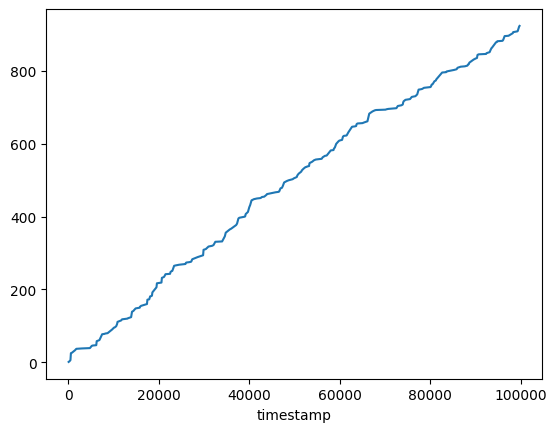

In [34]:
kelpt.groupby('timestamp')['quantity'].sum().cumsum().plot()

In [35]:
resin

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
5,0,100,RAINFOREST_RESIN,10002,1,10000.0,2.0,9998.0,4.0,10004,1,10005.0,21.0,NaN,NaN,10003.0,0.0
7,0,200,RAINFOREST_RESIN,9996,1,9995.0,21.0,NaN,NaN,10004,1,10005.0,21.0,NaN,NaN,10000.0,2.0
11,0,300,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,5.0
12,0,400,RAINFOREST_RESIN,9998,8,9996.0,2.0,9995.0,26.0,10004,2,10005.0,26.0,NaN,NaN,10001.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,0,99500,RAINFOREST_RESIN,9995,20,NaN,NaN,NaN,NaN,9998,3,10005.0,20.0,NaN,NaN,9996.5,1925.0
2989,0,99600,RAINFOREST_RESIN,9995,28,NaN,NaN,NaN,NaN,10005,28,NaN,NaN,NaN,NaN,10000.0,1931.0
2992,0,99700,RAINFOREST_RESIN,9995,26,NaN,NaN,NaN,NaN,10005,26,NaN,NaN,NaN,NaN,10000.0,1931.0
2994,0,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,1939.0


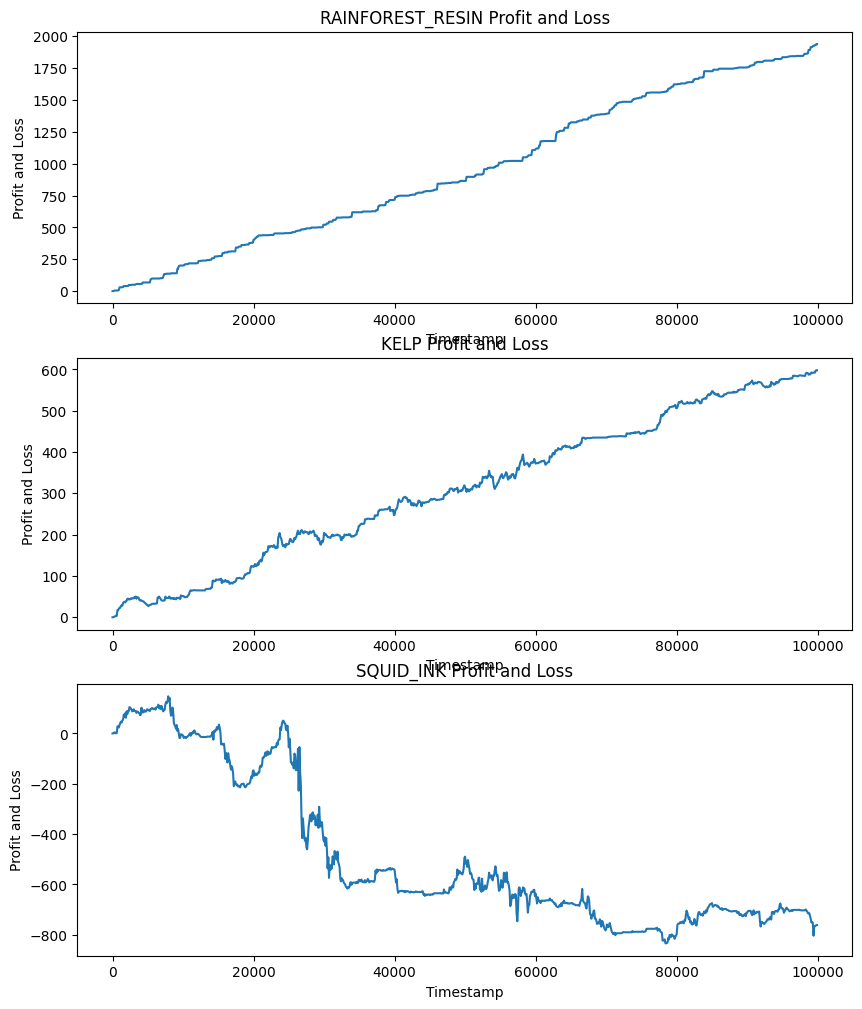

In [36]:
# line chart of resin, kelp, ink profit_and_loss over timestamp
plt.figure(figsize=(10, 12))

for df in [ink, resin, kelp]:
    plt.subplot(3, 1, df.index[0] + 1)
    plt.plot(df['timestamp'], df['profit_and_loss'])
    plt.title(df['product'].iloc[0] + ' Profit and Loss')
    plt.xlabel('Timestamp')
    plt.ylabel('Profit and Loss')
plt.show()

In [37]:
# profits of each at the last timestamp
print("Profits at last timestamp:")
print('Resin:', resin['profit_and_loss'].iloc[-1])
print('Kelp:', kelp['profit_and_loss'].iloc[-1])
print('Ink:', ink['profit_and_loss'].iloc[-1])


Profits at last timestamp:
Resin: 1939.0
Kelp: 598.04931640625
Ink: -761.2137451171875


In [38]:
trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,,SUBMISSION,KELP,SEASHELLS,2031,1
1,100,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1
2,100,,SUBMISSION,SQUID_INK,SEASHELLS,1970,1
3,200,,SUBMISSION,KELP,SEASHELLS,2031,1
4,200,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10003,1
...,...,...,...,...,...,...,...
1192,99700,SUBMISSION,,KELP,SEASHELLS,2029,2
1193,99700,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9996,2
1194,99700,SUBMISSION,,SQUID_INK,SEASHELLS,1967,2
1195,99900,,,KELP,SEASHELLS,2028,1


In [39]:
market.drop(columns=['profit_and_loss']).to_csv('submissions/prices_round_1_day_.csv', index=False)

In [40]:
'''
website submission

trader_best2
Profits at last timestamp:
Resin: 1939.0
Kelp: 506.599609375
Ink: 1572.0

trader_kin2:
Profits at last timestamp:
Resin: 1914.0
Kelp: 107.0
Ink: 639.597412109375

'''


'''
new data results:

trader_best2
Resin: 1939.0
Kelp: 598.04931640625
Ink: -761.2137451171875

trader_kin2
Profits at last timestamp:
Resin: 1914.0
Kelp: 147.0
Ink: 27.0

'''

'\nnew data results:\n\ntrader_best2\nResin: 1939.0\nKelp: 598.04931640625\nInk: -761.2137451171875\n\ntrader_kin2\nProfits at last timestamp:\nResin: 1914.0\nKelp: 147.0\nInk: 27.0\n\n'

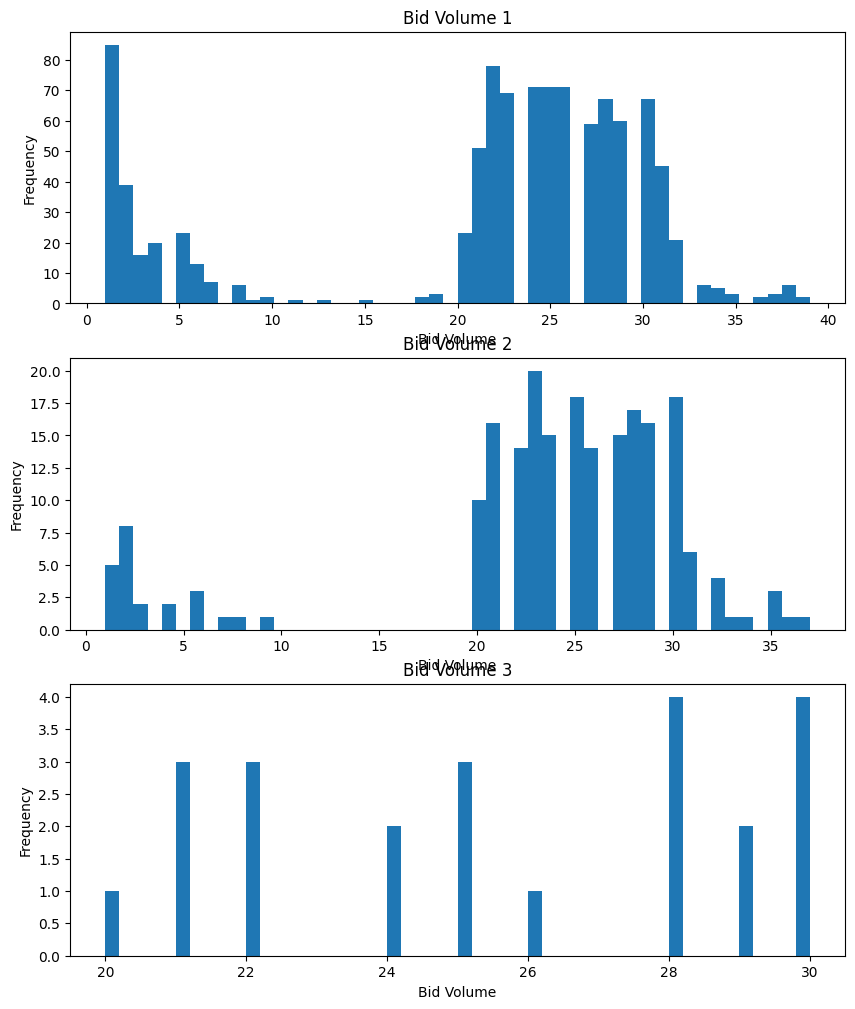

In [41]:
plt.figure(figsize=(10, 12))
for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.hist(ink['bid_volume_' + str(i)], bins=50)
    plt.title('Bid Volume ' + str(i))
    plt.xlabel('Bid Volume')
    plt.ylabel('Frequency')

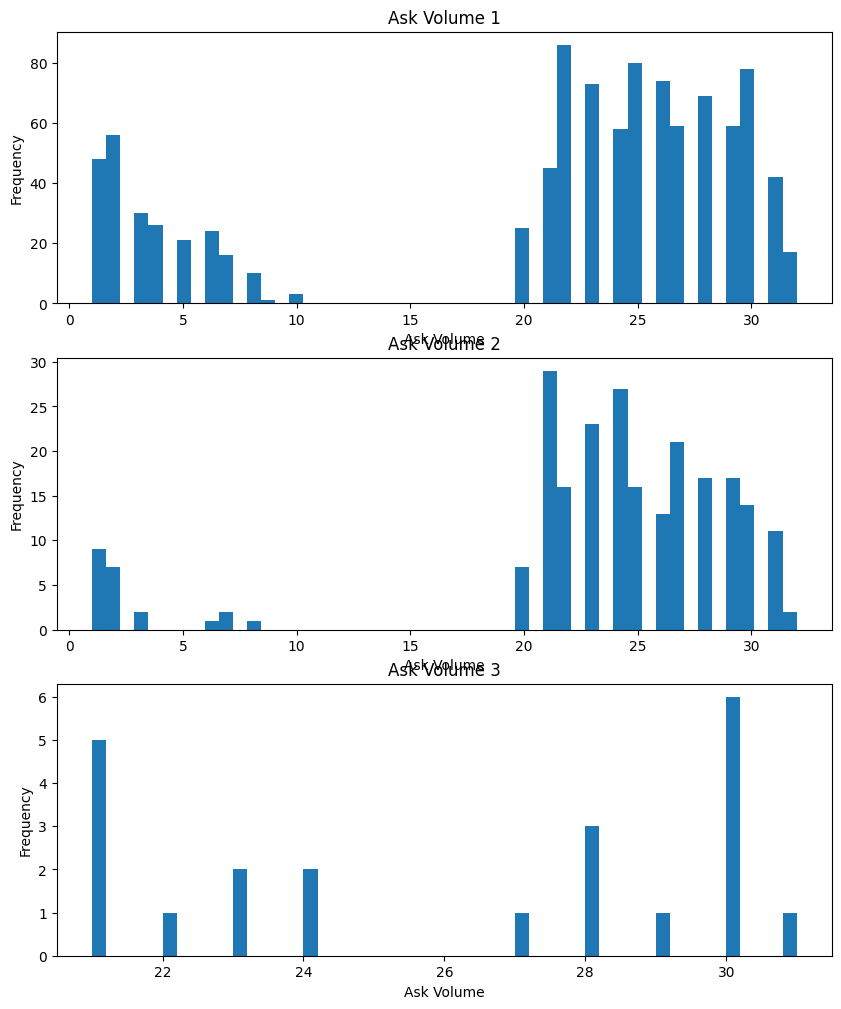

In [42]:
plt.figure(figsize=(10, 12))
for i in range(1, 4):
    plt.subplot(3, 1, i)
    plt.hist(ink['ask_volume_' + str(i)], bins=50)
    plt.title('Ask Volume ' + str(i))
    plt.xlabel('Ask Volume')
    plt.ylabel('Frequency')